In [2]:
import numpy as np
import math
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

In [ ]:
l, t, h = 20, 18, 0.5
σ = float(input("Enter CFL:"))
τ = σ * h
X = np.linspace(0, l, int(l/h) + 1)
T = np.linspace(0, t, int(t/τ) + 1)
u = [round(math.sin((4 * math.pi * x)/l), 3) for x in X]

Схема уголок против потока:

  1)  $\frac{y_{m}^{n+1} + y_{m}^{n}}{τ}$ -  $\frac{y_{m}^{n} - y_{m-1}^{n}}{h}$ = 0
  
Схема Лакса–Вендроффа:

  2) $\frac{y_{m}^{n+1} - y_{m}^{n}}{τ}$ +  $\frac{y_{m+1}^{n} - y_{m-1}^{n}}{2h}$ - $\frac{τ}{2}\ \frac{y_{m+1}^{n} - 2y_{m}^{n} + y_{m-1}^{n}}{h^2}$= 0

In [ ]:
def f1(y0, y1):
    y = y1 -  σ * (y1 - y0)
    return y


def f2(y0, y1, y2):
    y = y1 + (σ**2/2)*(y2 - 2*y1 + y0) - (σ/2) * (y2 - y0)
    return y

In [ ]:
cs = [[0] * len(X) for i in range(len(T))]
lws = [[0] * len(X) for i in range(len(T))]
cs[0] = u
lws[0] = u

In [ ]:
for i in range(0, len(T)-1):
    for j in range(1, len(X)):
        cs[i + 1][j] = f1(cs[i][j-1], cs[i][j])
    cs[i + 1][0] = cs[i + 1][len(X) - 1]

In [ ]:
for i in range(0, len(T)-1):
    for j in range(len(X)):
        lws[i + 1][j] = f2(lws[i][j-1], lws[i][j],lws[i][j+1-len(X)])
        lws[i + 1][0] = lws[i + 1][len(X) - 1]

In [ ]:
%matplotlib notebook
plt.style.use('seaborn-pastel')

fig = plt.figure()
ax = plt.axes(xlim=(0, 20), ylim=(-2, 2))
plt.title('Схема уголок') 
line, = ax.plot([], [], lw=3)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

def init():
    time_text.set_text('')
    line.set_data([], [])
    return line,
def animate(i):
    x = X
    y = cs[i]
    time_text.set_text(i)
    line.set_data(x, y)
    return line,
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=18, interval=300, blit=True)
anim.save('Схема уголок.gif', writer='imagemagick')
 

<IPython.core.display.Javascript object>


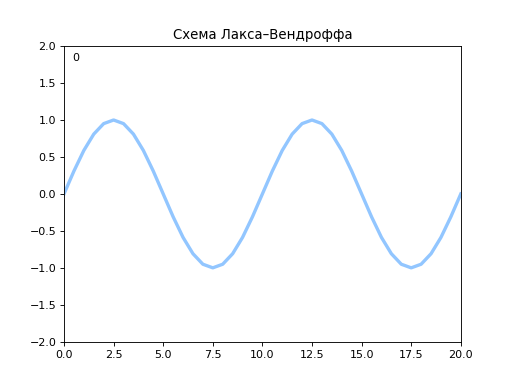

In [26]:
%matplotlib notebook
plt.style.use('seaborn-pastel')

fig = plt.figure()
ax = plt.axes(xlim=(0, 20), ylim=(-2, 2))
plt.title('Схема Лакса–Вендроффа') 
line, = ax.plot([], [], lw=3)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

def init():
    time_text.set_text('')
    line.set_data([], [])
    return line,
def animate(i):
    x = X
    y = lws[i]
    time_text.set_text(i)
    line.set_data(x, y)
    return line,
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=18, interval=300, blit=True)